[INFO] -- LOADING NURIA: randoms0588.csv                                                            
Step 1000/1000 | 00:00:55 elapsed ||--------------------|| 100% -- 55.530 ms/step, ETA: 00:00:00  


Production test results:

random traces injected: 1000
summed traces duration: 0.017s
total T2 trigger found: 27
*********************************
TRIGGER FREQUENCY = 1588.38 +- 305.68 Hz


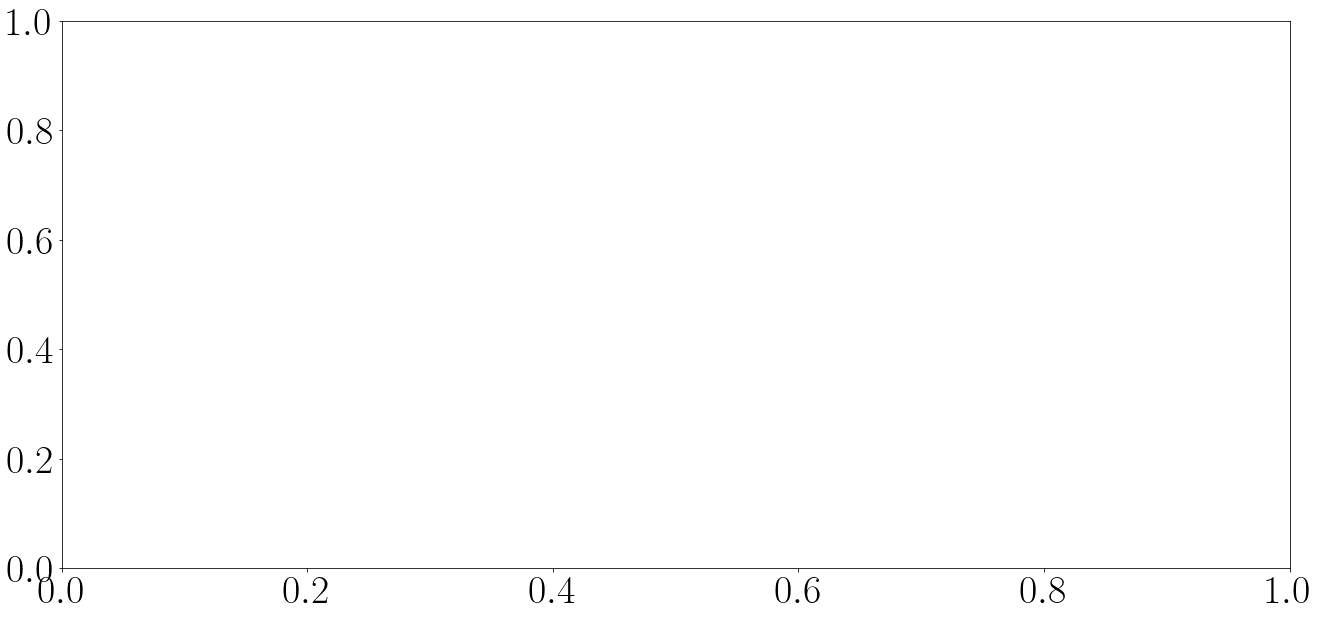

In [1]:
from Binaries import *

def main():

    Trigger = HardwareClassifier()
    Trigger.production_test(1000)

import cProfile

cProfile.run('main()', "performance/output.dat")

import pstats

with open("performance/output_time.dat", "w") as f:
    p = pstats.Stats("performance/output.dat", stream = f)
    p.sort_stats("time").print_stats()

In [2]:
from Binaries import *

Events = EventGenerator("19_19.5", split = 0)

[INFO] -- LOADING LO_QUI_DON: randoms2152.csv                                                            


In [8]:
def plot_trace_window(trace : np.ndarray, index : int, start_time : str, downsampled : bool) -> None : 

    (pmt1, pmt2, pmt3), x = trace, len(trace[0])
    assert len(pmt1) == len(pmt2) == len(pmt3), "TRACE LENGTHS DO NOT MATCH"

    plt.rcParams["figure.figsize"] = [20, 10]

    plt.plot(range(x), pmt1, label = r"PMT \#1")
    plt.plot(range(x), pmt2, label = r"PMT \#2")
    plt.plot(range(x), pmt3, label = r"PMT \#3")

    

    plt.ylabel(r"Signal / VEM$_\mathrm{Peak}$")
    plt.xlabel(r"Bin / $8.33\,\mathrm{ns}$" if not downsampled else r"Bin / $25\,\mathrm{ns}$")
    plt.xlim(0, x)
    plt.legend(loc = "upper right")

    plt.text(2, 0.9 * max(max(pmt1), max(pmt1)))

    plt.tight_layout()
    
    # plt.savefig(f"/cr/users/filip/plots/production_tests/{self.name.replace('/','-')}/{start_time}/trigger_{index}")
    # plt.cla()

StopIteration: 

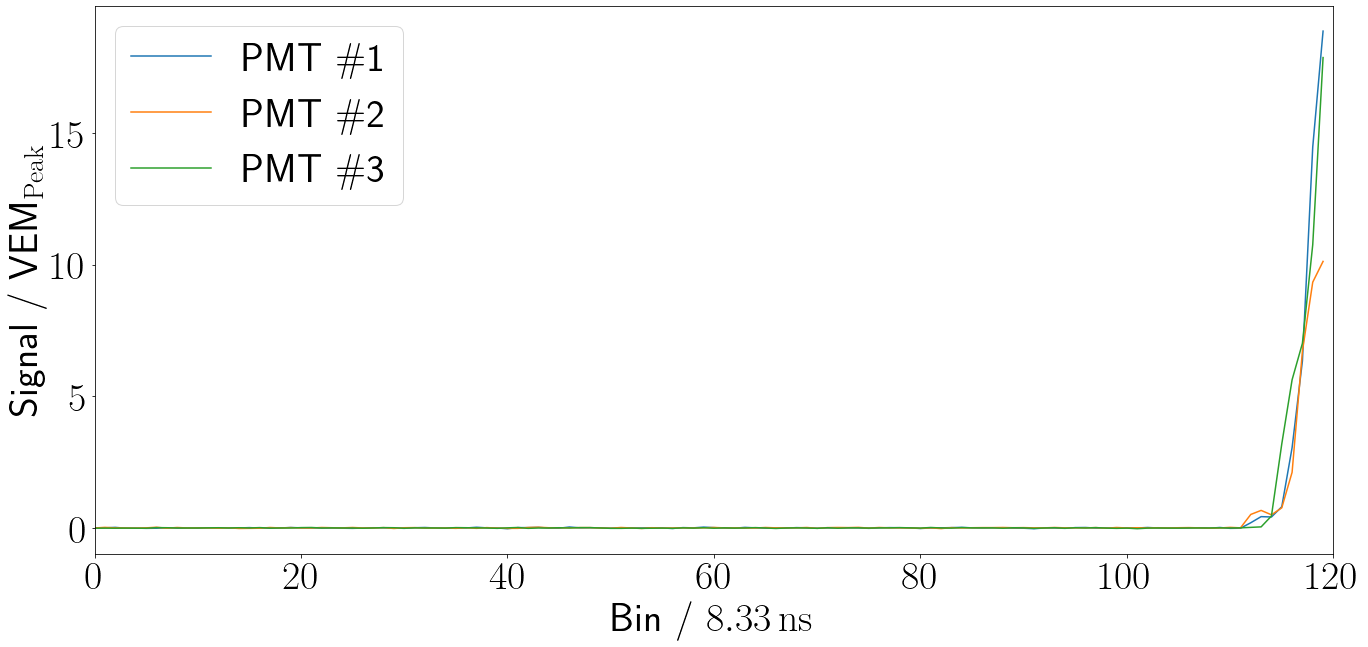

In [7]:
for batch in Events:
    for trace in batch:
        for window in trace:
            plot_trace_window(window, 0, 0, False)

            raise StopIteration